In [1]:
import matplotlib
%matplotlib inline

In [25]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

import seaborn as sns

import os
os.chdir("/home/ec2-user/scVI/")
os.getcwd()

from umap import UMAP

use_cuda = True
import torch

# import data loading functions

In [3]:
from scvi.harmonization.utils_chenling import get_matrix_from_dir
from scvi.dataset.pbmc import PbmcDataset
from scvi.harmonization.utils_chenling import assign_label
import numpy as np
from scvi.dataset.dataset import GeneExpressionDataset
from copy import deepcopy


# import scVI models

In [4]:
from scvi.inference import UnsupervisedTrainer, AlternateSemiSupervisedTrainer
from scvi.models.scanvi import SCANVI
from scvi.models.vae import VAE

In [5]:
dataset1 = PbmcDataset(filter_out_de_genes=False)
dataset1.update_cells(dataset1.batch_indices.ravel()==0)
dataset1.subsample_genes(dataset1.nb_genes)

count, geneid, cellid = get_matrix_from_dir('cite')
count = count.T.tocsr()
seurat = np.genfromtxt('../cite/cite.seurat.labels', dtype='str', delimiter=',')
cellid = np.asarray([x.split('-')[0] for x in cellid])
labels_map = [0, 0, 1, 2, 3, 4, 5, 6]
labels = seurat[1:, 4]
cell_type = ['CD4 T cells', 'NK cells', 'CD14+ Monocytes', 'B cells','CD8 T cells', 'FCGR3A+ Monocytes', 'Other']
dataset2 = assign_label(cellid, geneid, labels_map, count, cell_type, seurat)
set(dataset2.cell_types).intersection(set(dataset2.cell_types))


File data/gene_info_pbmc.csv already downloaded
File data/pbmc_metadata.pickle already downloaded
File data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 33694 to 21425 genes
Downsampling from 8381 to 8381 cells
File data/10X/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 33694 to 19773 genes
Downsampling from 4340 to 4340 cells
Keeping 19039 genes
Downsampling from 12721 to 11990 cells
Downsampling from 19039 to 19036 genes
Downsampling from 11990 to 11990 cells
Downsampling from 11990 to 7982 cells


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:604: RuntimeWarning: Degrees of freedom <= 0 for slice
  return N.ndarray.var(self, axis, dtype, out, ddof, keepdims=True)._collapse(axis)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: i

Downsampling from 19036 to 19011 genes
Downsampling from 7982 to 7982 cells


{'B cells',
 'CD14+ Monocytes',
 'CD4 T cells',
 'CD8 T cells',
 'FCGR3A+ Monocytes',
 'NK cells',
 'Other'}

In [6]:
rmCellTypes = 'CD4 T cells'

In [7]:
pbmc = deepcopy(dataset1)
newCellType = [k for i, k in enumerate(dataset1.cell_types) if k not in [rmCellTypes,'Others']]
pbmc.filter_cell_types(newCellType)
gene_dataset = GeneExpressionDataset.concat_datasets(pbmc, dataset2)
pbmc = deepcopy(gene_dataset)
pbmc.update_cells(pbmc.batch_indices.ravel() == 0)
pbmc.subsample_genes(pbmc.nb_genes)
pbmc2 = deepcopy(gene_dataset)
pbmc2.update_cells(gene_dataset.batch_indices.ravel() == 1)
pbmc2.subsample_genes(dataset2.nb_genes)


Downsampling from 7982 to 4618 cells
Keeping 14968 genes
Downsampling from 11234 to 4618 cells


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:604: RuntimeWarning: Degrees of freedom <= 0 for slice
  return N.ndarray.var(self, axis, dtype, out, ddof, keepdims=True)._collapse(axis)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: i

Downsampling from 14968 to 14889 genes
Downsampling from 4618 to 4618 cells
Downsampling from 11234 to 6616 cells
Downsampling from 14968 to 14956 genes
Downsampling from 6616 to 6616 cells


In [8]:
gene_dataset.subsample_genes(1000)

Downsampling from 14968 to 14967 genes
Downsampling from 11234 to 11234 cells


/home/ec2-user/scVI/scvi/dataset/dataset.py:178: RuntimeWarning: divide by zero encountered in true_divide
  subset_genes = np.argsort(std_scaler.var_ / std_scaler.mean_)[::-1][:new_n_genes]
/home/ec2-user/scVI/scvi/dataset/dataset.py:178: RuntimeWarning: invalid value encountered in true_divide
  subset_genes = np.argsort(std_scaler.var_ / std_scaler.mean_)[::-1][:new_n_genes]


Downsampling from 14967 to 1288 genes
Downsampling from 14967 to 1288 genes
Downsampling from 11234 to 11234 cells


In [9]:
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches,
      n_hidden=128, n_latent=10, n_layers=2, dispersion='gene')
trainer = UnsupervisedTrainer(vae, gene_dataset, train_size=1.0)
if os.path.isfile('../PopRemove/posterior.vae.%s.pkl' % rmCellTypes.replace(' ','')):
    trainer.model.load_state_dict(torch.load('../PopRemove/posterior.vae.%s.pkl' % rmCellTypes.replace(' ','')))
    trainer.model.eval()
else:
    trainer.train(n_epochs=250)
    torch.save(trainer.model.state_dict(), '../PopRemove/posterior.vae.%s.pkl' % rmCellTypes.replace(' ',''))

In [10]:
from scvi.inference import AlternateSemiSupervisedTrainer,SemiSupervisedTrainer
scanvi = SCANVI(gene_dataset.nb_genes, gene_dataset.n_batches, gene_dataset.n_labels,
                  n_hidden=128, n_latent=10, n_layers=2, dispersion='gene')
scanvi.load_state_dict(trainer.model.state_dict(), strict=False)
# trainer_scanvi = SemiSupervisedTrainer(scanvi, gene_dataset, n_epochs_classifier=1, lr_classification=5 * 1e-3)
trainer_scanvi = AlternateSemiSupervisedTrainer(scanvi, gene_dataset, n_epochs_classifier=100, lr_classification=5 * 1e-3)

trainer_scanvi.labelled_set = trainer_scanvi.create_posterior(indices=(gene_dataset.batch_indices == 0))
trainer_scanvi.unlabelled_set = trainer_scanvi.create_posterior(indices=(gene_dataset.batch_indices == 1))
trainer_scanvi.train(n_epochs=5)


training: 100%|██████████| 5/5 [00:36<00:00,  7.40s/it]


In [11]:
unlabelled_idx = trainer_scanvi.unlabelled_set.indices
labelled_idx = trainer_scanvi.labelled_set.indices

In [12]:
np.unique(gene_dataset.labels.ravel()[labelled_idx])

array([0, 2, 3, 4, 5, 6, 7, 8])

In [13]:
np.unique(gene_dataset.labels.ravel()[unlabelled_idx])

array([0, 1, 2, 3, 4, 6, 7])

In [14]:
rm_idx = np.arange(len(gene_dataset.cell_types))[gene_dataset.cell_types == rmCellTypes][0]

In [15]:
rm_idx

1

In [16]:
full_scanvi = trainer_scanvi.create_posterior(trainer_scanvi.model, gene_dataset, indices=np.arange(len(gene_dataset)))
all_y_pred = []
for i_batch, tensors in enumerate(full_scanvi.sequential()):
    sample_batch, _, _, _, _ = tensors
    all_y_pred += [scanvi.classify(sample_batch)]

all_y_pred = np.array(torch.cat(all_y_pred))    

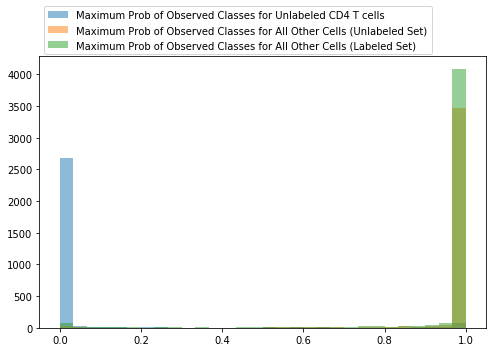

In [26]:
max_prob=(np.max(np.delete(all_y_pred,rm_idx,1),axis=1))

fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(max_prob[(gene_dataset.batch_indices.ravel() ==1)*(gene_dataset.labels.ravel() ==rm_idx)], 30, alpha=0.5, label='Maximum Prob of Observed Classes for Unlabeled CD4 T cells')
plt.hist(max_prob[(gene_dataset.batch_indices.ravel() ==1)*(gene_dataset.labels.ravel() !=rm_idx)], 30, alpha=0.5, label='Maximum Prob of Observed Classes for All Other Cells (Unlabeled Set)')
plt.hist(max_prob[gene_dataset.batch_indices.ravel() ==0], 30, alpha=0.5, label='Maximum Prob of Observed Classes for All Other Cells (Labeled Set)')
plt.legend(loc='upper left',bbox_to_anchor=(0, 1.2))
fig.tight_layout()
fig.savefig("figures/SCANVI_PopRemove_posterior.pdf", transparency=True)
# plt.show()

### SCANVI latent space

In [18]:
from scvi.metrics.clustering import select_indices_evenly

In [19]:
latent_scanvi, _, _ = full_scanvi.sequential().get_latent()

In [20]:
keys = gene_dataset.cell_types
key_order = np.argsort(keys)
key_order = [x for x in key_order if (keys[x] !='Other')]
labels = gene_dataset.labels.ravel()
batch_indices = gene_dataset.batch_indices.ravel()
sample = select_indices_evenly(2000, labels)
colors = sns.color_palette('tab20')
latent_s = latent_scanvi[sample, :]
label_s = labels[sample]
batch_s = batch_indices.ravel()[sample]
latent_scanvi_u = UMAP(spread=2).fit_transform(latent_s)

key_order = [x for x in key_order if (keys[x] !='Other')]


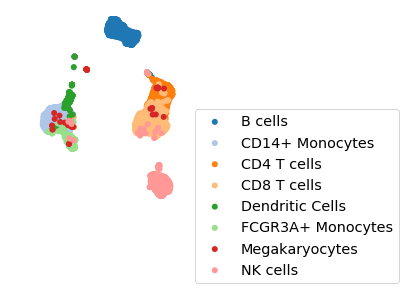

In [27]:

colors = sns.color_palette('tab20')
fig, ax = plt.subplots(figsize=(6, 4))
for i,k in enumerate(key_order):
    idx = (label_s ==k)
    ax.scatter(latent_scanvi_u[idx, 0], latent_scanvi_u[idx, 1], c=colors[i%20], label=keys[k],
                   edgecolors='none')
    plt.legend(bbox_to_anchor=(1.1, 0.5), borderaxespad=0, fontsize='x-large')
plt.axis("off")
fig.tight_layout()
plt.savefig("figures/SCANVI_poprm_scanviUMAP_labels.txt.pdf", transparency=True)


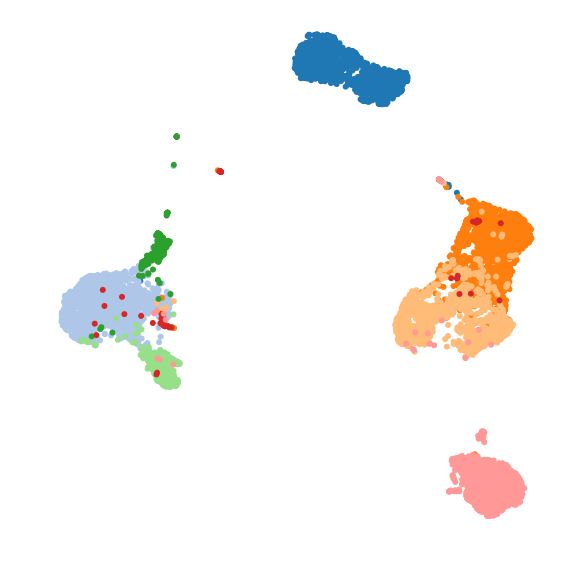

In [29]:

colors = sns.color_palette('tab20')
fig, ax = plt.subplots(figsize=(8, 8))
for i,k in enumerate(key_order):
    idx = (label_s ==k)
    ax.scatter(latent_scanvi_u[idx, 0], latent_scanvi_u[idx, 1], c=colors[i%20], label=keys[k],
                   edgecolors='none')
plt.axis("off")
fig.tight_layout()
plt.savefig("figures/SCANVI_poprm_scanviUMAP.pdf", transparency=True)


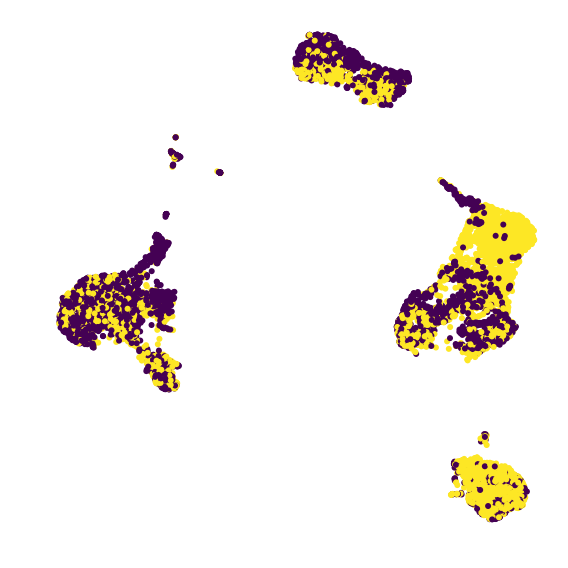

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(latent_scanvi_u[:, 0], latent_scanvi_u[:, 1], c=batch_s, label=k,
               edgecolors='none')
plt.axis("off")
fig.tight_layout()
plt.savefig("figures/SCANVI_poprm_scanviUMAP_batch.pdf", transparency=True)


### scVI latent space

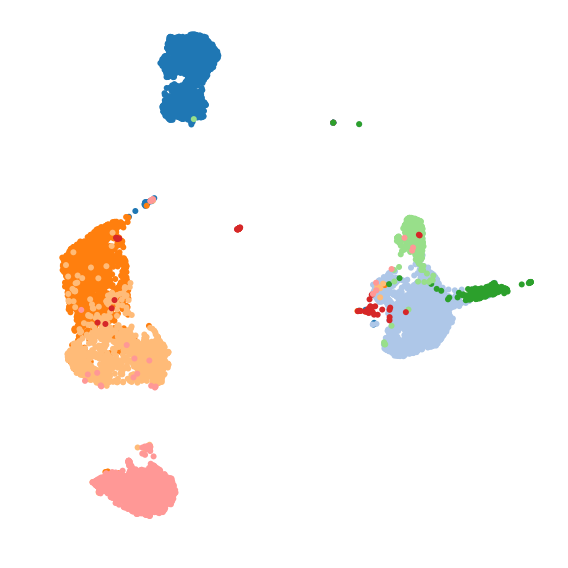

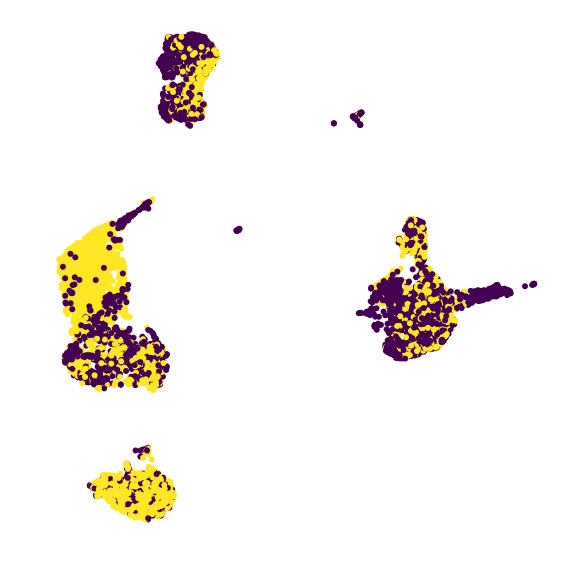

In [36]:
full = trainer.create_posterior(trainer.model, gene_dataset, indices=np.arange(len(gene_dataset)))

latent, _, _ = full.sequential().get_latent()
latent_s = latent[sample, :]

from umap import UMAP
latent_u = UMAP(spread=2).fit_transform(latent_s)

fig, ax = plt.subplots(figsize=(8, 8))
for i,k in enumerate(key_order):
    idx = label_s==k
    ax.scatter(latent_u[idx, 0], latent_u[idx, 1], c=colors[i%20], label=keys[k],
                   edgecolors='none')
# plt.legend(bbox_to_anchor=(1.1, 0.5), borderaxespad=0, fontsize='x-large')
plt.axis("off")
fig.tight_layout()
plt.savefig("figures/SCANVI_stress_scVIUMAP_labels.pdf", transparency=True)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(latent_u[:, 0], latent_u[:, 1], c=batch_s, label=k,
               edgecolors='none')
plt.axis("off")
fig.tight_layout()
plt.savefig("figures/SCANVI_poprm_scVIUMAP_batch.pdf", transparency=True)
